# Libs

# Introducción

## Introducción al problema

La optimización de la producción agrícola es un pilar fundamental para la sostenibilidad y competitividad del sector agroindustrial. Para el Ingenio La Providencia, la variabilidad en el rendimiento de la caña por hectárea (TCH) y en la calidad de la materia prima (medida por el % de sacarosa) representa un desafío constante en la planificación de sus operaciones. Esta incertidumbre puede afectar directamente la logística de la cosecha, la eficiencia de los procesos en planta y, en última instancia, la rentabilidad del negocio.

El presente proyecto aborda este desafío mediante la aplicación de técnicas de machine learning sobre los datos históricos del ingenio. El objetivo principal es desarrollar modelos predictivos capaces de estimar con precisión dos indicadores críticos:

1.  **Las Toneladas de Caña por Hectárea (TCH)**, para anticipar el volumen de producción.
2.  **El Porcentaje de Sacarosa (%Sac.Caña)**, para prever la calidad y el potencial de azúcar extraíble.

Adicionalmente, se busca crear un sistema de clasificación que categorice el desempeño de los cultivos en niveles **alto, medio y bajo** para ambas variables. La implementación exitosa de estos modelos permitirá al Ingenio La Providencia pasar de una toma de decisiones reactiva a una estrategia proactiva, optimizando la gestión de recursos, mejorando la planificación de la zafra y maximizando tanto la productividad como la calidad de su producción.

## Descripción del Conjunto de Datos

Los datos provenientes de la base de datos **`HISTORICO_SUERTES.xlsx`** conforman un registro detallado de las operaciones agrícolas y los resultados de producción del Ingenio La Providencia. Se presume que cada fila representa un evento de cosecha para una "suerte" (lote de cultivo) específica. El conjunto de variables puede interpretarse y agruparse en las siguientes categorías funcionales:

### 1. Variables de Identificación y Agronómicas Fundamentales
Este grupo de variables permite identificar de manera única cada lote y describe sus características físicas y de cultivo.
* **Identificadores:** `Hacienda`, `Nombre` y `Suerte` funcionan como el identificador único de cada parcela. `Zona` y `Dist Km` la sitúan geográficamente y establecen su distancia a la planta, un factor logístico clave.
* **Características del Cultivo:** `Area Neta` define la superficie productiva del lote. Variables como `Suelo`, `Variedad`, `F.Siembra`, y `Cod.Estado` (que indica el número de corte, ej. "Plantilla" para la primera siembra o "Corte 2" para la segunda cosecha) son fundamentales, ya que definen el potencial genético y el ciclo de vida del cultivo.

### 2. Variables de Manejo y Prácticas Agrícolas
Aquí se registran las intervenciones humanas y las decisiones de manejo que influyen directamente en el desarrollo y la maduración de la caña.
* **Labores Culturales:** Se documentan prácticas clave como el riego (`Num.Riegos`, `M3 Riego`, `Ult.Riego`), la fertilización (`Fert.Nitrogen.`, `Urea 46%`, `Vinaza`) y el uso de madurantes químicos (`Producto`, `Dosis Madurante`), que son palancas críticas para optimizar el rendimiento.
* **Cosecha:** Variables como `Tipo Quema` (verde o quemada) y `T.Corte` (mecanizado o manual) describen el método de cosecha, el cual tiene un impacto directo en la calidad de la materia prima que llega al ingenio.

### 3. Variables de Producción y Calidad (Variables Objetivo)
Este es el grupo más importante, ya que contiene los indicadores de desempeño que se busca predecir.
* **Productividad:** La variable principal es **`TCH` (Toneladas de Caña por Hectárea)**, que mide el rendimiento agrícola del lote. Está directamente relacionada con `TonUltCorte`, que es la producción total en toneladas.
* **Calidad:** La variable clave de calidad es **`%Sac.Caña`**, que representa el porcentaje de sacarosa en la caña y determina su valor para la producción de azúcar. Se complementa con otras métricas como `Rdto` (Rendimiento industrial) y `%ATR` (Azúcares Totales Recuperables), que también reflejan la eficiencia en la extracción de azúcar.

### 4. Variables Climáticas y Ambientales
El desempeño de un cultivo depende en gran medida del entorno. Este grupo de variables busca capturar esas condiciones.
* **Clima:** Se registran datos meteorológicos cruciales como `Lluvias`, `Temp. Media`, `Humedad Rel Media` y `Radiacion Solar`. Es notable que estas variables están agregadas en diferentes ventanas de tiempo (ej. `0-3 meses`, `Ciclo completo`), lo que permite analizar cómo las condiciones climáticas en distintas etapas fenológicas del cultivo afectan el resultado final.
* **Sanidad:** La variable `%Infest.Diatrea` es un indicador de la salud del cultivo, midiendo el impacto de una de las plagas más significativas de la caña de azúcar.

La base de datos **`BD_IPSA_1940.xlsx`** proporciona un conjunto de variables consolidadas, orientadas a la tarea de clasificación del desempeño de los lotes. A diferencia del set de datos históricos para regresión, este parece estar más enfocado en factores agronómicos clave y los resultados finales de cosecha. Cada fila representa un evento de cosecha para una variedad específica, CC01-1940.

Las variables presentes pueden agruparse e interpretarse de la siguiente manera:

### 1. Variables de Identificación y Características del Cultivo
Este grupo de variables permite identificar el lote y define sus condiciones agronómicas básicas.
* **Identificadores:** `NOME`, `FAZ` (Hacienda) y `TAL` (Talhão o Suerte) identifican la unidad productiva específica.
* **Características Agronómicas:** `variedad` especifica el tipo de caña. `tipocorte` describe el método de cosecha. `cortes` indica el número de cosechas que ha tenido la planta (su ciclo de soca), y `edad` representa la edad del cultivo en meses al momento del corte, dos factores determinantes en la productividad.

### 2. Variables de Manejo de Maduración
Un conjunto de variables está dedicado exclusivamente a la práctica de maduración química, sugiriendo su importancia como factor predictivo.
* `madurada`: Es una variable categórica (SI/NO) que indica si se aplicó o no un producto para inducir la maduración.
* `producto`, `dosismad` (Dosis del Madurante) y `semsmad` (Semanas desde la aplicación hasta la cosecha): Detallan el tipo de madurante utilizado, la cantidad y el tiempo de acción, lo que permite evaluar la efectividad de esta práctica agrícola.

### 3. Indicadores de Desempeño y Calidad (Variables a Clasificar)
Estas son las variables centrales del problema. A partir de ellas se construirán las categorías de "alto", "medio" y "bajo" rendimiento.
* **Variables Objetivo (Continuas):** **`TCH` (Toneladas de Caña por Hectárea)** y **`sacarosa` (%)** son los indicadores directos de la productividad agrícola y la calidad industrial, respectivamente. Estos valores serán la base para crear las etiquetas de clasificación.
* **Indicadores Adicionales:** `pct_diatrea` (% de infestación de Diatraea) y `me` (probablemente Materia Extraña) son métricas que reflejan la sanidad y limpieza del cultivo, factores que impactan negativamente tanto el TCH como la sacarosa. `vejez` podría indicar el tiempo en horas o días entre el corte y la molienda, un factor crítico para la calidad.

### 4. Variables de Contexto Temporal y Ambiental
Este grupo final de variables sitúa cada cosecha en un contexto específico.
* `mes` y `periodo`: Definen el momento exacto de la cosecha, permitiendo analizar la estacionalidad.
* `lluvias`: Es una variable climática fundamental que resume las precipitaciones acumuladas en un periodo relevante para la cosecha.
* `grupo_tenencia`: Es una variable categórica que probablemente se refiere al tipo de propiedad o administración del lote (ej. propio, arrendado), lo cual puede implicar diferencias en las estrategias de manejo.

# Modelo de Regresión

## Análisis Exploratorio de Datos (EDA)

In [54]:
import pandas as pd

# Opción para ver TODAS las filas (None significa sin límite)
pd.set_option('display.max_rows', None)

# Opción para ver TODAS las columnas (None significa sin límite)
pd.set_option('display.max_columns', None)

# Opción para aumentar el ancho de la línea y evitar que se corte la tabla
pd.set_option('display.width', 1000)

In [55]:
# Carga del documento BD_IPSA_1940
import pandas as pd

file_name = 'data/HISTORICO_SUERTES.xlsx'

df = pd.read_excel(file_name)

df.head(3)

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,Cod.Estado #,Cod.Estado,F.Siembra,D.S.,Ult.Riego,Edad Ult Cos,F.Ult.Corte,Destino 1=Semilla,Cod. T.Cultivo,Cultivo,Fec.Madur.,Producto,Dosis Madurante,Semanas mad.,TonUltCorte,TCH,TCHM,Ton.Azucar,Rdto,TAH,TAHM,Sac.Caña Precosecha,Edad.Precosecha,%Sac.Caña,%Sac.Muestreadora,%ATR,KATRHM,%Fibra Caña,%AR Jugo,%ME Min,%ME Veg,%ME Tot,Brix,Pureza,Vejez,Tipo Quema,T.Corte,Cerca de,Cosechó,Num.Riegos,M3 Riego,DDUlt.Riego,Lluvias (2 Meses Ant.),Lluvias Ciclo,Lluvias 0 -3,Lluvias tres a seis,Lluvias seis a nueve,Luvias 9 -FC,%Infest.Diatrea,Fosfato Jugo,Fert.Nitrogen.,Urea 46%,MEZ,Boro Granul.,MicroZinc,NITO_XTEND,Sul.Amonio,NITRAX-S,Vinaza,Codigo Estacion,Temp. Media 0-3,Temp. Media Ciclo,Temp Max Ciclo,Temp Min Ciclo,Humedad Rel Media 0-3,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
0,201701,80493,LA CONCHA,IP02,51.0,002A,CANTARINA,6.00,4.3,CC85-92,5,Corte 5,2010-08-20,NaN,NaT,12.81,2017-01-02,0,1.0,Normal,2016-11-04,BONUS 250 EC REGULADOR FISIOLÓGICO,1.0,8.428571,727.19,121.198333,9.461228,86.050,11.8332,14.341666,1.119567,16.8172,NaN,13.7582,13.508,15.1653,1434.823641,16.910,0.84,0.355,10.198,10.553,15.7464,87.2241,2.735,VERDE,MECANIZADO,El Cerrito,AI08,NaN,0.0,0,258.0,1038.0,0.0,454.0,102.0,482.0,NaN,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,UKRANIA INCAUCA,IP05,81.0,039B,NaN,1.45,NaN,CC85-92,5,Corte 5,2011-01-27,NaN,NaT,11.14,2017-01-02,0,1.0,Normal,NaT,NaN,0.0,NaN,136.00,93.793103,8.419488,14.728,10.8294,10.157241,0.911781,NaN,NaN,12.8430,12.551,14.0410,1182.180399,16.936,0.55,2.298,7.273,9.571,15.2240,84.3602,73.823,Q.ACCIDENTAL,MANUAL,Candelaria,AI08,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,382.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,EL AMPARO SAA,IP05,31.0,007,CORINTIAS,8.24,23.0,CC01-1228,4,Corte 4,2011-10-25,1.65,2016-09-17,12.32,2017-01-02,0,1.0,Normal,2016-11-04,BONUS 250 EC REGULADOR FISIOLÓGICO,1.1,8.428571,1436.62,174.347087,14.151549,145.268,10.1117,17.629611,1.430974,14.7749,12.02,11.9364,11.940,13.1236,1857.192723,15.512,0.61,3.000,9.323,12.323,14.1130,84.4527,2.108,VERDE,MECANIZADO,Palmira,AI08,5.0,48513.6,107,246.0,1002.0,106.0,326.0,113.0,457.0,NaN,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df.describe()

,Período,Hacienda,Tenencia,Area Neta,Dist Km,Cod.Estado #,Edad Ult Cos,Destino 1=Semilla,Cod. T.Cultivo,Dosis Madurante,Semanas mad.,TonUltCorte,TCH,TCHM,Ton.Azucar,Rdto,TAH,TAHM,Sac.Caña Precosecha,Edad.Precosecha,%Sac.Caña,%Sac.Muestreadora,%ATR,KATRHM,%Fibra Caña,%AR Jugo,%ME Min,%ME Veg,%ME Tot,Brix,Pureza,Vejez,Num.Riegos,M3 Riego,DDUlt.Riego,Lluvias (2 Meses Ant.),Lluvias Ciclo,Lluvias 0 -3,Lluvias tres a seis,Lluvias seis a nueve,Luvias 9 -FC,%Infest.Diatrea,Fosfato Jugo,Fert.Nitrogen.,Urea 46%,MEZ,Boro Granul.,MicroZinc,NITO_XTEND,Sul.Amonio,NITRAX-S,Vinaza,Temp. Media 0-3,Temp. Media Ciclo,Temp Max Ciclo,Temp Min Ciclo,Humedad Rel Media 0-3,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
count,21027.000000,21027.000000,21026.000000,21027.000000,21022.000000,21027.000000,21027.00000,21027.000000,21025.000000,20923.000000,11252.000000,21027.000000,21027.000000,21027.000000,20786.000000,20760.000000,20786.000000,20786.000000,19929.000000,8919.000000,20578.000000,19169.000000,20505.000000,20505.000000,19169.000000,18903.000000,19305.00000,19307.000000,19307.000000,20760.000000,20758.000000,18582.000000,8438.000000,21027.000000,21027.000000,21027.000000,21027.000000,21027.000000,21027.000000,21027.000000,21027.000000,5600.000000,19169.000000,0.0,7.230000e+02,971.000000,1285.000000,1149.000000,3679.000000,1357.000000,748.000000,4098.000000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,0.0,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000
mean,202039.708708,80679.334427,46.448730,8.642948,25.311806,4.261806,13.01111,0.013982,1.036100,0.536335,9.588708,1141.737477,129.608509,10.050417,124.249246,10.733766,13.888988,1.071335,7.802876,12.360247,12.320202,12.834918,13.718671,1372.453892,15.275538,0.737819,0.63653,7.761020,8.600761,13.130479,77.805153,12.294125,7.215691,25725.851363,45.997717,75.116456,526.176110,122.333534,120.193700,118.080529,165.606631,3.811395,332.501252,NaN,1.848838e+04,481.805869,118.158210,128.934639,2360.857856,2447.356346,1530.278591,74481.323472,23.375724,24.556072,34.587837,15.416313,81.176861,80.764679,16.059757,24.556072,NaN,435.119397,438.344500,298.258587,1209.462980,442.941369,1912.479868
std,216.642895,590.030150,21.513498,7.049533,18.237344,4.111935,1.97907,0.117419,0.186543,0.539796,5.585010,1018.073158,32.846029,2.502829,111.842688,1.517069,3.805457,0.284829,8.507614,1.420836,1.145738,2.001026,1.451582,341.453701,2.493603,0.238630,0.95059,3.108904,2.482570,4.238401,24.487124,20.993880,16.276732,57539.237598,76.510120,98.054033,551.550097,145.134130,144.103575,141.096477,233.114931,2.820273,1605.182193,NaN,4.579260e+05,542.391407,112.947454,110.225440,2855.789893,2342.687825,1469.082903,69189.671641,1.254361,2.471964,0.984804,0.487640,2.848861,2.752029,1.300131,2.471964,NaN,21.307392,18.582606,102.901635,340.463189,43.680452,307.978328
min,201701.000000,80100.000000,11.000000,0.004000,1.100000,0.000000,1.31000,0.000000,1.000000,0.000000,-2.000000,0.420000,1.573653,0.138403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.086000,0.000000,7.750000,49.089172,0.000000,0.100000,0.00000,0.000000,0.200000,0.000000,0.000000,0.017000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.900000e+01,1.000000,1.000000,1.000000,33.000000,7.000000,1.300000,5.921000,22.040000,22.353000,32.600000,13.900000,60.341000,63.327000,12.500000,22.353000,NaN,352.013000,367.315000,23.100000,23.100000,190.400000,190.400000
25%,201812.000000,80247.000000,31.000000,3.310000,12.000000,1.000000,11.93000,0.000000,1.000000,0.000000,6.571428,398.442500,108.691426,8.463211,42.282500,10.117175,11.690238,0.909263,0.000000,11.530000,11.619000,12.148700,13.015800,1165.486757,14.327400,0.568600,0.12100,6.786150,7.431900,13.470875,83.517250,2.10800

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21027 non-null  object        
 12  F.Si

## Preparación de datos

In [58]:
# 1. Identifica las variables o columnas en el dataset con valores nulos
columnas_con_nulos = [
    (columna, df[columna].isnull().sum())
    for columna in df.columns
    if df[columna].isnull().sum() > 0
]
# 2. Convertir la lista a un DataFrame de pandas para una mejor visualización
df_nulos = pd.DataFrame(columnas_con_nulos, columns=['Columna', 'Cantidad de Nulos'])

# Ordenar los resultados de mayor a menor
df_nulos_ordenado = df_nulos.sort_values(by='Cantidad de Nulos', ascending=False)


# Imprimir el DataFrame resultante
print("\nResultados en una tabla ordenada de mayor a menor:")
df_nulos_ordenado


Resultados en una tabla ordenada de mayor a menor:


,Columna,Cantidad de Nulos
51,Sum Oscilacion Temp Ciclo,21027
33,Fert.Nitrogen.,21027
34,Urea 46%,20304
40,NITRAX-S,20279
35,MEZ,20056
37,MicroZinc,19878
36,Boro Granul.,19742
39,Sul.Amonio,19670
38,NITO_XTEND,17348
41,Vinaza,16929


### **Análisis de Datos Faltantes y Estrategia de Mitigación**

Tras una revisión de la completitud de los datos para los **21,027 registros** del dataset, es evidente que existe un problema significativo de valores nulos que debe ser abordado antes de cualquier modelado. La estrategia para manejar estos datos se basará en el porcentaje de información faltante por columna, dividiendo el proceso en tres fases jerárquicas para asegurar la integridad y robustez del conjunto de datos final.

---

#### **Fase 1: Eliminación de Columnas Irrecuperables (> 75% de Nulos)**
Un gran número de columnas, principalmente relacionadas con datos de fertilizantes y mediciones climáticas específicas (`Sum Oscilacion Temp Ciclo`, `Fert.Nitrogen.`, `Urea 46%`, etc.), presentan más de un 75% de valores ausentes, llegando en algunos casos a estar completamente vacías. Intentar imputar tal cantidad de datos sería equivalente a fabricar información, lo que comprometería gravemente la validez de cualquier análisis posterior.

* **Acción:** Estas columnas serán **eliminadas directamente** del dataset. Su escasa información no justifica el riesgo de introducir sesgos a través de una imputación masiva.

In [59]:
# 1. Calcular el número total de filas en tu DataFrame
total_filas = len(df)

# 2. Definir el umbral del 75%
umbral = total_filas * 0.75

# 3. Identificar las columnas que tienen más nulos que el umbral
columnas_a_eliminar = [
    columna for columna in df.columns 
    if df[columna].isnull().sum() > umbral
]

# (Opcional pero recomendado) Imprimir las columnas que se van a eliminar
print(f"Se encontraron {len(columnas_a_eliminar)} columnas para eliminar con más del 75% de nulos:")
print(columnas_a_eliminar)

# 4. Eliminar esas columnas del DataFrame
df = df.drop(columns=columnas_a_eliminar)

# 5. Verificar el resultado
print(f"\nDimensiones originales del DataFrame: {df.shape}")
print(f"Dimensiones del nuevo DataFrame limpio: {df.shape}")

Se encontraron 24 columnas para eliminar con más del 75% de nulos:
['Fert.Nitrogen.', 'Urea 46%', 'MEZ', 'Boro Granul.', 'MicroZinc', 'NITO_XTEND', 'Sul.Amonio', 'NITRAX-S', 'Vinaza', 'Temp. Media 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo', 'Temp Min Ciclo', 'Humedad Rel Media 0-3 ', 'Humedad Rel Media Ciclo', 'Oscilacion Temp Med 0-3', 'Oscilacion Temp Ciclo', 'Sum Oscilacion Temp Ciclo', 'Radicion Solar 0-3', 'Radiacion Solar Ciclo', 'Precipitacion 0_3', 'Precipitacion Ciclo', 'Evaporacion 0-3', 'Evaporacion Ciclo']

Dimensiones originales del DataFrame: (21027, 61)
Dimensiones del nuevo DataFrame limpio: (21027, 61)


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Período                 21027 non-null  int64         
 1   Hacienda                21027 non-null  int64         
 2   Nombre                  21027 non-null  object        
 3   Zona                    21027 non-null  object        
 4   Tenencia                21026 non-null  float64       
 5   Suerte                  21027 non-null  object        
 6   Suelo                   17269 non-null  object        
 7   Area Neta               21027 non-null  float64       
 8   Dist Km                 21022 non-null  float64       
 9   Variedad                21027 non-null  object        
 10  Cod.Estado #            21027 non-null  int64         
 11  Cod.Estado              21027 non-null  object        
 12  F.Siembra               21027 non-null  dateti

---

#### **Fase 2: Imputación Estratégica para Columnas con Nulos Moderados (10% - 75%)**
Columnas como `Edad.Precosecha` (~58% nulos), `Num.Riegos` (~60% nulos) y `Suelo` (~18% nulos) contienen información potencialmente valiosa, pero con una cantidad considerable de datos faltantes. La estrategia aquí será más matizada y dependerá de la naturaleza de la variable.

* **Para variables categóricas:** Se imputará utilizando la **moda** asumiendo que es la condición más probable. Alternativamente, se podría crear una categoría "Desconocido" si se sospecha que la ausencia del dato es informativa.
* **Para variables numéricas:** Se imputará utilizando la **mediana** o la **media** dependiendo de cual sea mas conveniente con respecto a los datos

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular umbrales de 10% y 75%
total_filas = len(df)
umbral_inferior = total_filas * 0.10
umbral_superior = total_filas * 0.75

total_columnas_fase2 = [
    col for col in df.columns
    if (df[col].isnull().sum() > umbral_inferior) and \
       (df[col].isnull().sum() < umbral_superior)
]

print(f"Se analizarán {len(total_columnas_fase2)} columnas en la Fase 2:")
df[total_columnas_fase2].info()

Se analizarán 12 columnas en la Fase 2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suelo            17269 non-null  object        
 1   D.S.             7168 non-null   object        
 2   Ult.Riego        8470 non-null   datetime64[ns]
 3   Fec.Madur.       11252 non-null  datetime64[ns]
 4   Producto         11249 non-null  object        
 5   Semanas mad.     11252 non-null  float64       
 6   Edad.Precosecha  8919 non-null   float64       
 7   %AR Jugo         18903 non-null  float64       
 8   Vejez            18582 non-null  float64       
 9   Num.Riegos       8438 non-null   float64       
 10  %Infest.Diatrea  5600 non-null   float64       
 11  Codigo Estacion  6285 non-null   object        
dtypes: datetime64[ns](2), float64(6), object(4)
memory usage: 1.9+ MB


#### Numericas

--- Análisis de 'Semanas mad.' ---
  - Asimetría (Skewness): 3.43
  - Media: 9.59
  - Mediana: 8.57


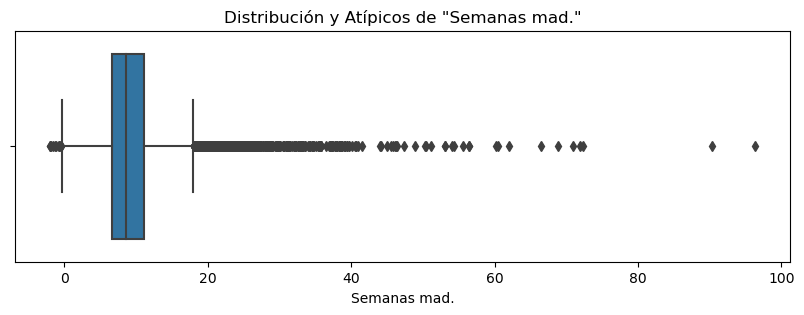



--- Análisis de 'Edad.Precosecha' ---
  - Asimetría (Skewness): -0.84
  - Media: 12.36
  - Mediana: 12.09


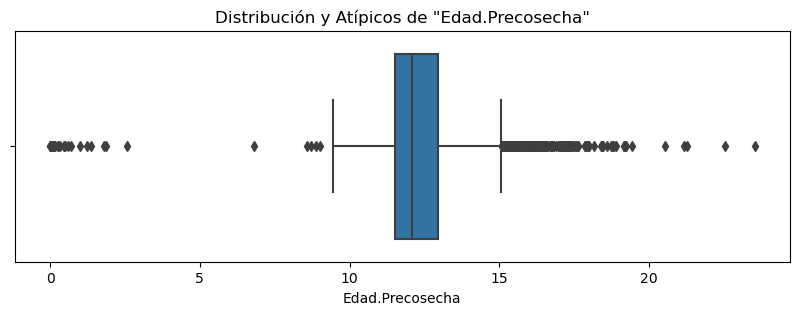



--- Análisis de '%AR Jugo' ---
  - Asimetría (Skewness): 1.18
  - Media: 0.74
  - Mediana: 0.70


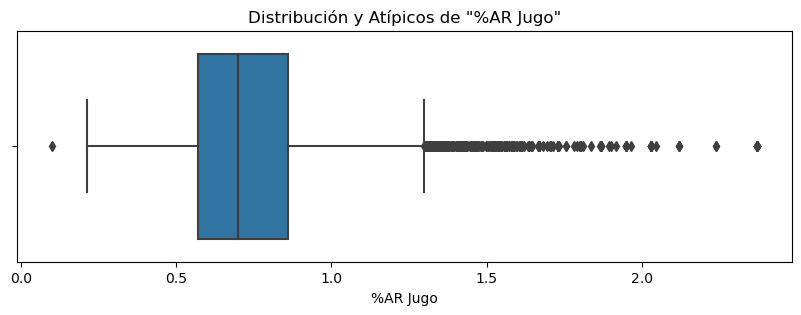



--- Análisis de 'Vejez' ---
  - Asimetría (Skewness): 2.90
  - Media: 12.29
  - Mediana: 2.74


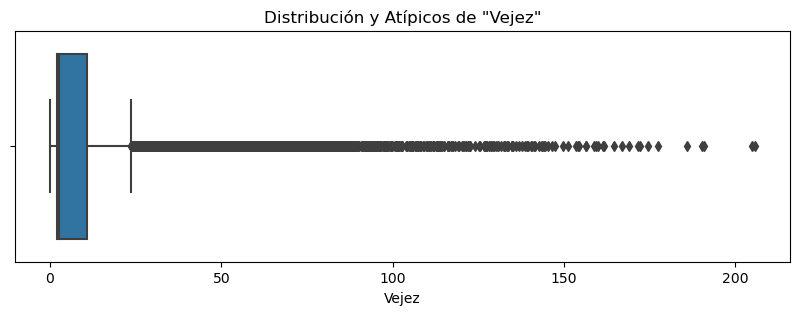



--- Análisis de 'Num.Riegos' ---
  - Asimetría (Skewness): 10.54
  - Media: 7.22
  - Mediana: 5.00


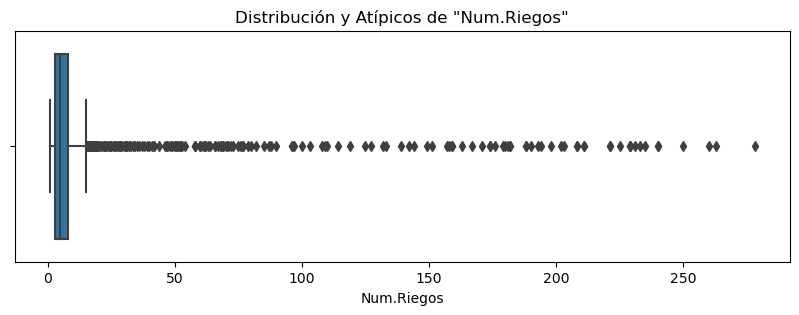



--- Análisis de '%Infest.Diatrea' ---
  - Asimetría (Skewness): 2.36
  - Media: 3.81
  - Mediana: 3.14


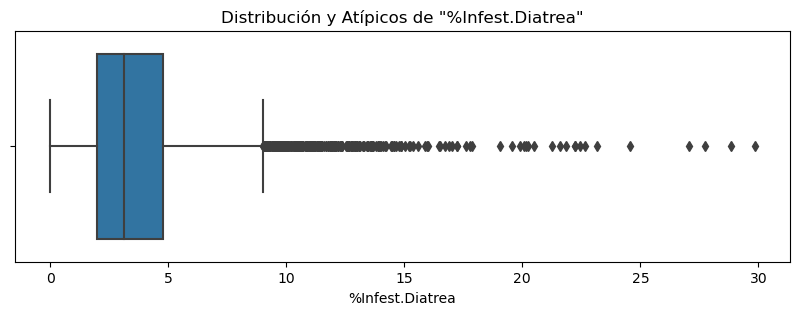

In [62]:
# Iteramos sobre cada columna para analizarla individualmente

columnas_fase2 = [
    col for col in total_columnas_fase2
    if df[col].dtype in ['int64', 'float64']
]

for columna in columnas_fase2:
    # --- Cálculo de estadísticas ---
    asimetria = df[columna].skew()
    media = df[columna].mean()
    mediana = df[columna].median()
    
    print(f"--- Análisis de '{columna}' ---")
    print(f"  - Asimetría (Skewness): {asimetria:.2f}")
    print(f"  - Media: {media:.2f}")
    print(f"  - Mediana: {mediana:.2f}")
    
    # --- Visualización del Boxplot ---
    plt.figure(figsize=(10, 3)) # Crea una figura nueva para cada gráfico
    sns.boxplot(x=df[columna])
    plt.title(f'Distribución y Atípicos de "{columna}"')
    plt.show() # Muestra el gráfico en la salida de la celda
    print("\n") # Agrega un espacio para mayor claridad

In [63]:
# Listas para clasificar las columnas
columnas_para_mediana = []
columnas_para_media = []

# Umbral de asimetría para decidir. Si |asimetría| > 1.0, se considera muy asimétrica.
umbral_asimetria = 1.0

# Clasificamos cada columna basándonos en su asimetría
for columna in columnas_fase2:
    asimetria = df[columna].skew()
    
    if abs(asimetria) > umbral_asimetria:
        columnas_para_mediana.append(columna)
    else:
        columnas_para_media.append(columna)

print("--- Clasificación Final para Imputación ---")
print(f"✅ Columnas a imputar con MEDIANA (distribución asimétrica):")
print(f"   {columnas_para_mediana}")
print(f"\n✅ Columnas a imputar con MEDIA (distribución simétrica):")
print(f"   {columnas_para_media}")

--- Clasificación Final para Imputación ---
✅ Columnas a imputar con MEDIANA (distribución asimétrica):
   ['Semanas mad.', '%AR Jugo', 'Vejez', 'Num.Riegos', '%Infest.Diatrea']

✅ Columnas a imputar con MEDIA (distribución simétrica):
   ['Edad.Precosecha']


In [64]:
# Imputar con la MEDIANA
if columnas_para_mediana:
    mediana_imputacion = df[columnas_para_mediana].median()
    df[columnas_para_mediana] = df[columnas_para_mediana].fillna(mediana_imputacion)
    print("-> Valores nulos imputados con la MEDIANA.")

# Imputar con la MEDIA
if columnas_para_media:
    media_imputacion = df[columnas_para_media].mean()
    df[columnas_para_media] = df[columnas_para_media].fillna(media_imputacion)
    print("-> Valores nulos imputados con la MEDIA.")


df[columnas_para_mediana].info()
df[columnas_para_media].info()

-> Valores nulos imputados con la MEDIANA.
-> Valores nulos imputados con la MEDIA.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Semanas mad.     21027 non-null  float64
 1   %AR Jugo         21027 non-null  float64
 2   Vejez            21027 non-null  float64
 3   Num.Riegos       21027 non-null  float64
 4   %Infest.Diatrea  21027 non-null  float64
dtypes: float64(5)
memory usage: 821.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Edad.Precosecha  21027 non-null  float64
dtypes: float64(1)
memory usage: 164.4 KB


#### Categoricas

--- Análisis de Distribución para: 'Suelo' ---
Conteo de valores (incluyendo nulos):
CORINTIAS               4042
NaN                     3758
GALPON                  2282
PALMIRA                 1457
MANUELITA                742
NUEVO PICHICHI           599
CERRITO                  431
BURRIGA                  415
PALMERAS                 407
SANTA ROSA               336
RIO LA PAILA             285
GENOVA                   278
AMAIME                   272
JUANCHITO                239
GUADUAL                  236
BALLESTEROS              229
CERRITO-NIMA             227
JORDAN                   213
PALMICHE                 210
NIMA                     195
ESNEDA                   170
MARSELLA                 167
MARGARITA                158
TIBET                    156
GENOVEZ                  139
JAMAICA                  139
NARINO                   132
VILLA                    115
PALMIRITA                115
OVEJERA                  110
ESMERALDA                107
YUMBO           

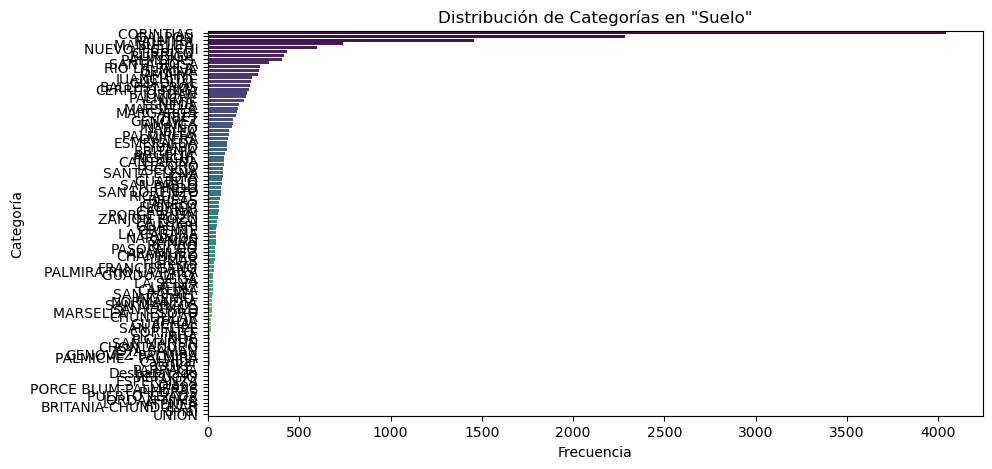



--- Análisis de Distribución para: 'D.S.' ---
Conteo de valores (incluyendo nulos):
NaN     13859
1.65     7148
DS         19
1.5         1
Name: D.S., dtype: int64




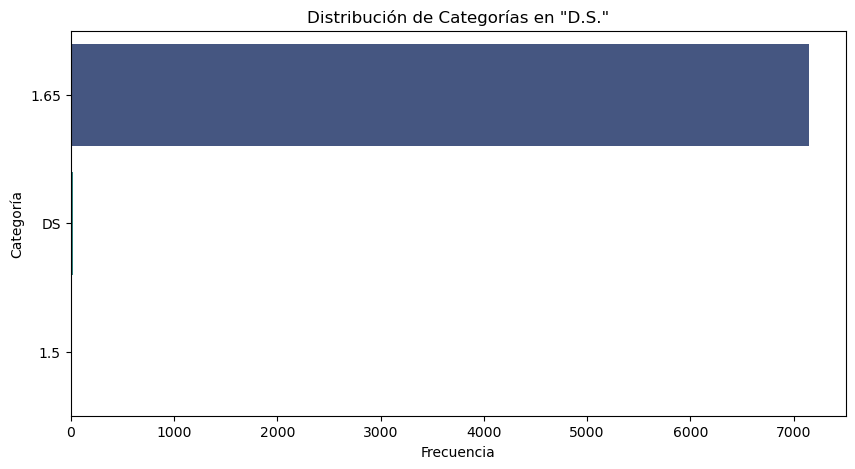



--- Análisis de Distribución para: 'Producto' ---
Conteo de valores (incluyendo nulos):
NaN                                      9778
BONUS 250 EC REGULADOR FISIOLÓGICO       7001
BONUS 250 EC REGULADOR FISIOLOGICO       3380
COADYUVANTE  DOUCE                        380
FERTILIZANTE LIQUIDO RENDIMIENTO          179
FUSILADE 2000 BL                           84
AGROFOSK-M                                 54
MADURANTE REGULADOR TRONNUSPAC 250 EC      36
FERTILIZANTE ORGÁNICO PATER-M              31
ROUND-UP MONSANTO 747 GRANULADO            29
baykal                                     22
PRODUCTO ENSAYO EN LITROS                  18
MADURANTE BIO SAFE ORGANIC                 17
TRANSLOK                                    7
OTROS MADURANTES                            4
GREEN LIFE                                  3
AMINA 2-4-D                                 2
HERBICIDA CLICK 40 SC                       1
GLIFOLAQ                                    1
Name: Producto, dtype: int64




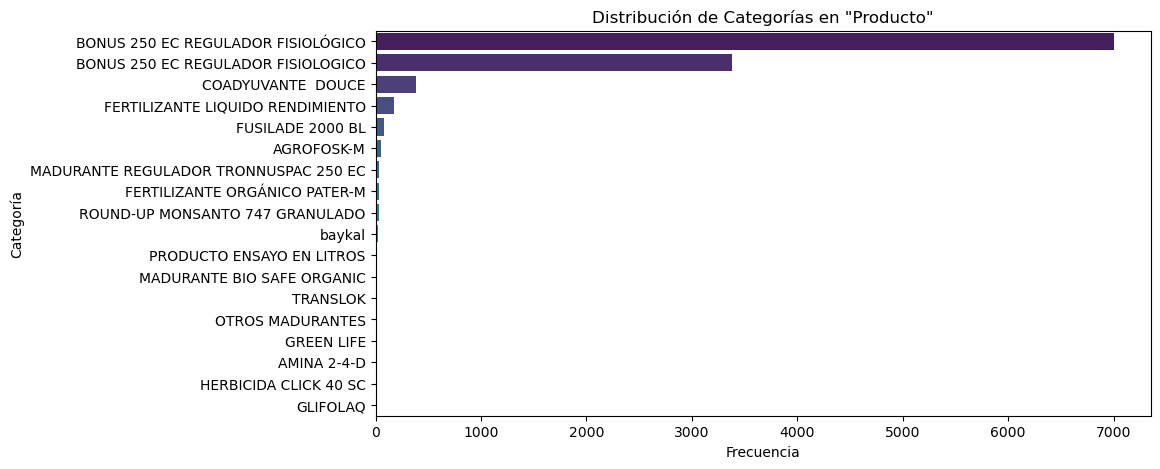



--- Análisis de Distribución para: 'Codigo Estacion' ---
Conteo de valores (incluyendo nulos):
NaN    14742
999     1749
GUA      894
GIN      748
AMA      708
ROZ      641
MAR      318
YOT      310
AER      282
PLR      135
HON      110
PSJ       98
CAN       95
BUG       80
BLG       51
PTA       17
PRA       16
RIO       15
TUL       12
005        4
008        2
Name: Codigo Estacion, dtype: int64




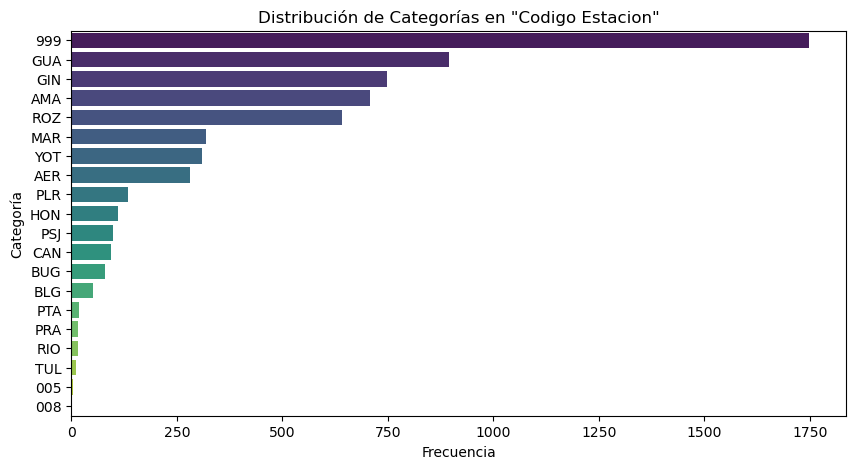

In [65]:
columnas_categoricas = [
    col for col in total_columnas_fase2
    if df[col].dtype == 'object'
]

for columna in columnas_categoricas:
    print(f"--- Análisis de Distribución para: '{columna}' ---")
    
    # Muestra el conteo de cada categoría, incluyendo los nulos (NaN)
    # Esto es clave para ver el panorama completo.
    print("Conteo de valores (incluyendo nulos):")
    print(df[columna].value_counts(dropna=False))
    print("\n")
    
    # Visualiza la distribución con un gráfico de barras (countplot)
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[columna], order=df[columna].value_counts().index, palette='viridis')
    plt.title(f'Distribución de Categorías en "{columna}"')
    plt.xlabel('Frecuencia')
    plt.ylabel('Categoría')
    plt.show() # Muestra el gráfico en la salida de la celda
    print("\n" + "="*50 + "\n")

---

#### **Fase 3: Imputación Simple o Eliminación de Filas (< 10% de Nulos)**
Finalmente, las columnas con un bajo porcentaje de datos faltantes (< 10%), como `Dist Km`, `Ton.Azucar`, y `Rdto`, son las más sencillas de tratar. El impacto de la imputación o eliminación es mínimo.

* **Acción:** Para estas variables, se utilizará una imputación por la **media** (si la distribución es simétrica) o la **mediana**. Dado el bajo número de filas afectadas, la **eliminación directa de los registros** que contienen estos nulos es también una opción viable y limpia que se considerará.

El objetivo de este plan es limpiar y consolidar el dataset de manera metódica, maximizando la retención de información útil mientras se asegura la robustez y fiabilidad de los datos para el modelado predictivo.

In [66]:
# Calcular el umbral del 10%
total_filas = len(df)
umbral_10_porciento = total_filas * 0.10

# Filtrar columnas numéricas con nulos por debajo del umbral
columnas_fase3 = [
    col for col in df.columns
    if (df[col].isnull().sum() > 0) and \
       (df[col].isnull().sum() < umbral_10_porciento) and \
       (df[col].dtype in ['int64', 'float64'])
]

if not columnas_fase3:
    print("🎉 ¡No hay columnas numéricas con menos del 10% de nulos por tratar!")
else:
    print(f"Se analizarán {len(columnas_fase3)} columnas en la Fase 3:")
    df[columnas_fase3].info()

Se analizarán 20 columnas en la Fase 3:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tenencia             21026 non-null  float64
 1   Dist Km              21022 non-null  float64
 2   Cod. T.Cultivo       21025 non-null  float64
 3   Dosis Madurante      20923 non-null  float64
 4   Ton.Azucar           20786 non-null  float64
 5   Rdto                 20760 non-null  float64
 6   TAH                  20786 non-null  float64
 7   TAHM                 20786 non-null  float64
 8   Sac.Caña Precosecha  19929 non-null  float64
 9   %Sac.Caña            20578 non-null  float64
 10  %Sac.Muestreadora    19169 non-null  float64
 11  %ATR                 20505 non-null  float64
 12  KATRHM               20505 non-null  float64
 13  %Fibra Caña          19169 non-null  float64
 14  %ME Min              19305 non-null  float64
 

--- Análisis de 'Tenencia' ---
  - Nulos: 1 (0.00%)
  - Asimetría (Skewness): 0.04
  - Media: 46.45
  - Mediana: 51.00


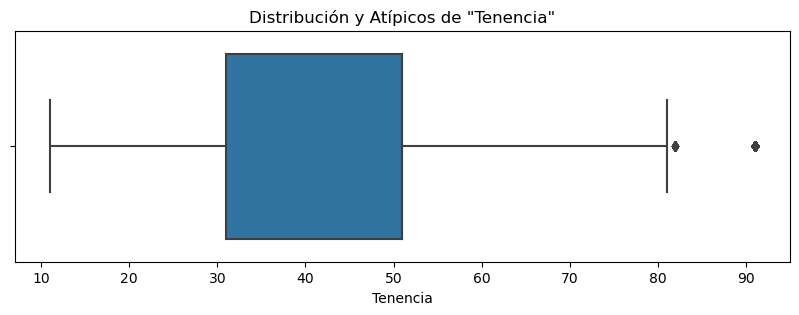



--- Análisis de 'Dist Km' ---
  - Nulos: 5 (0.02%)
  - Asimetría (Skewness): 1.81
  - Media: 25.31
  - Mediana: 21.90


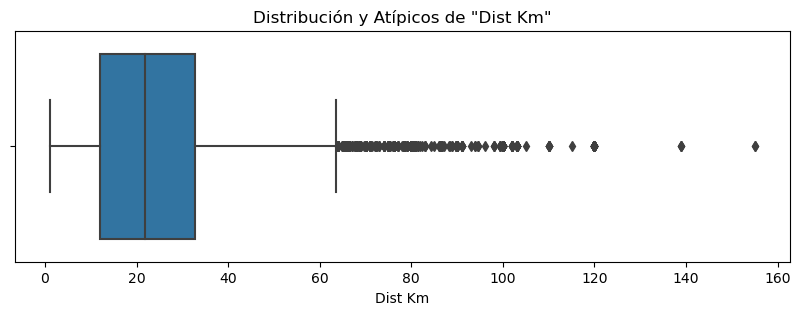



--- Análisis de 'Cod. T.Cultivo' ---
  - Nulos: 2 (0.01%)
  - Asimetría (Skewness): 4.97
  - Media: 1.04
  - Mediana: 1.00


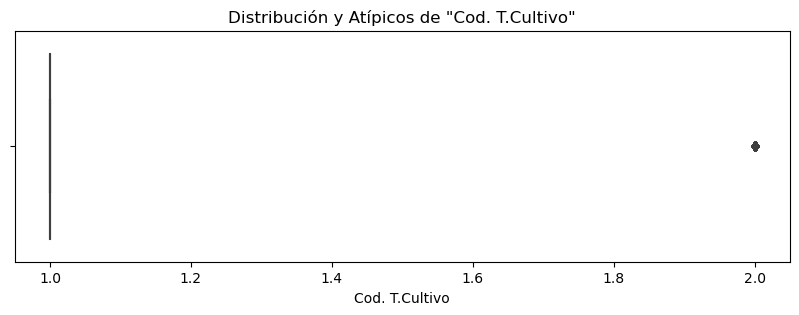



--- Análisis de 'Dosis Madurante' ---
  - Nulos: 104 (0.49%)
  - Asimetría (Skewness): 0.34
  - Media: 0.54
  - Mediana: 0.60


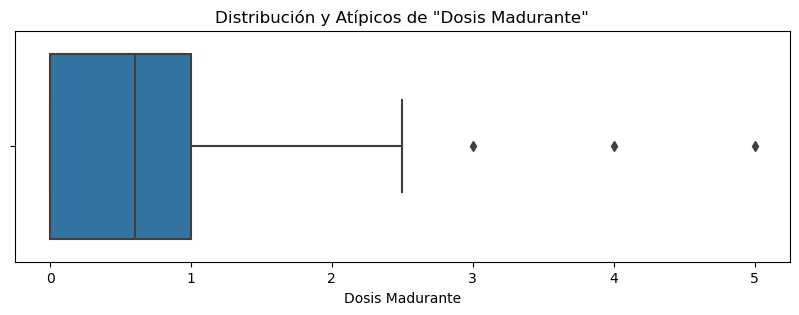



--- Análisis de 'Ton.Azucar' ---
  - Nulos: 241 (1.15%)
  - Asimetría (Skewness): 1.75
  - Media: 124.25
  - Mediana: 93.74


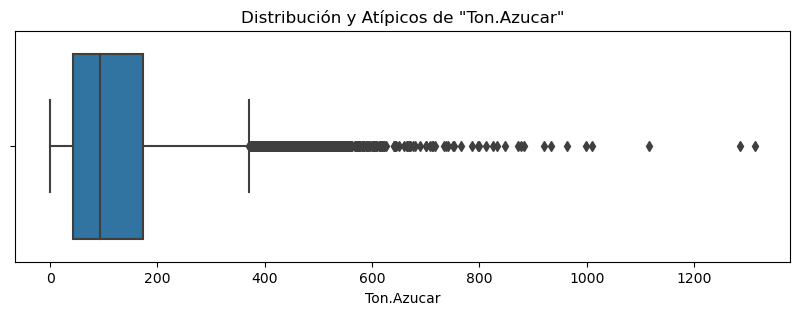



--- Análisis de 'Rdto' ---
  - Nulos: 267 (1.27%)
  - Asimetría (Skewness): -3.20
  - Media: 10.73
  - Mediana: 10.89


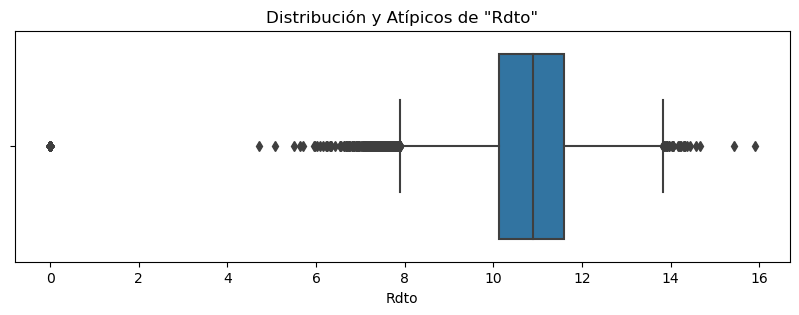



--- Análisis de 'TAH' ---
  - Nulos: 241 (1.15%)
  - Asimetría (Skewness): -0.18
  - Media: 13.89
  - Mediana: 14.01


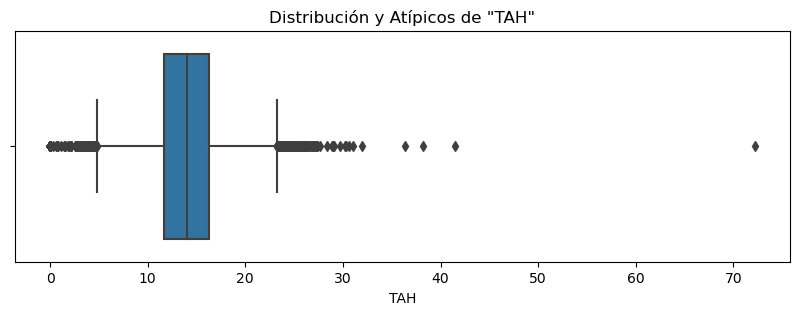



--- Análisis de 'TAHM' ---
  - Nulos: 241 (1.15%)
  - Asimetría (Skewness): -0.20
  - Media: 1.07
  - Mediana: 1.09


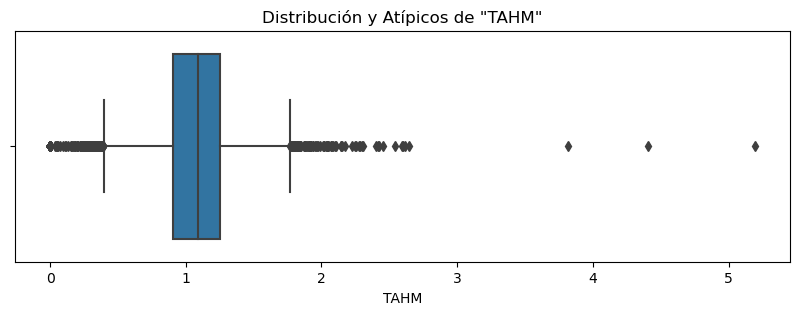



--- Análisis de 'Sac.Caña Precosecha' ---
  - Nulos: 1098 (5.22%)
  - Asimetría (Skewness): 0.20
  - Media: 7.80
  - Mediana: 0.00


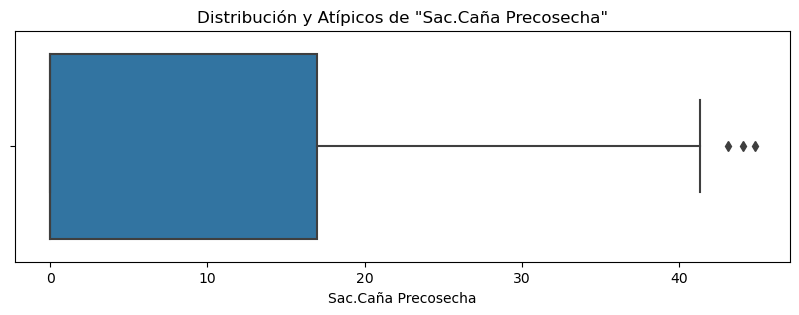



--- Análisis de '%Sac.Caña' ---
  - Nulos: 449 (2.14%)
  - Asimetría (Skewness): -0.26
  - Media: 12.32
  - Mediana: 12.37


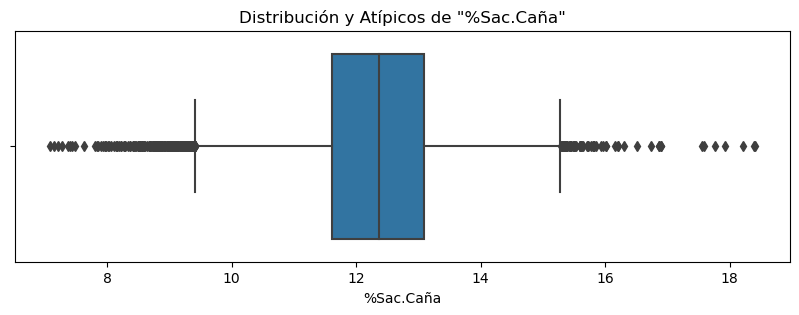



--- Análisis de '%Sac.Muestreadora' ---
  - Nulos: 1858 (8.84%)
  - Asimetría (Skewness): -3.65
  - Media: 12.83
  - Mediana: 13.05


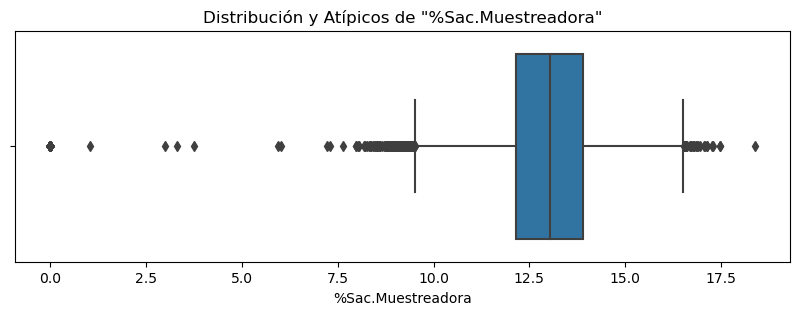



--- Análisis de '%ATR' ---
  - Nulos: 522 (2.48%)
  - Asimetría (Skewness): 35.51
  - Media: 13.72
  - Mediana: 13.75


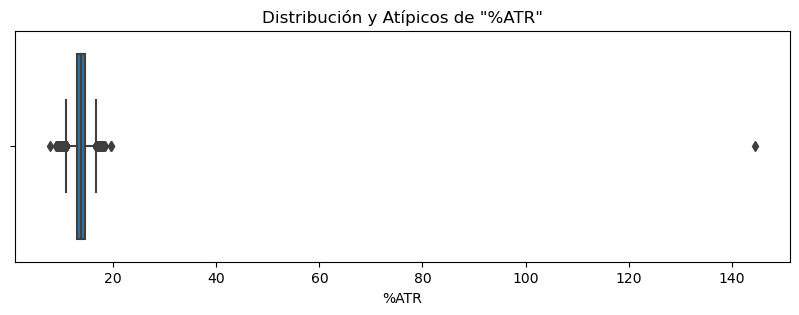



--- Análisis de 'KATRHM' ---
  - Nulos: 522 (2.48%)
  - Asimetría (Skewness): 3.39
  - Media: 1372.45
  - Mediana: 1383.49


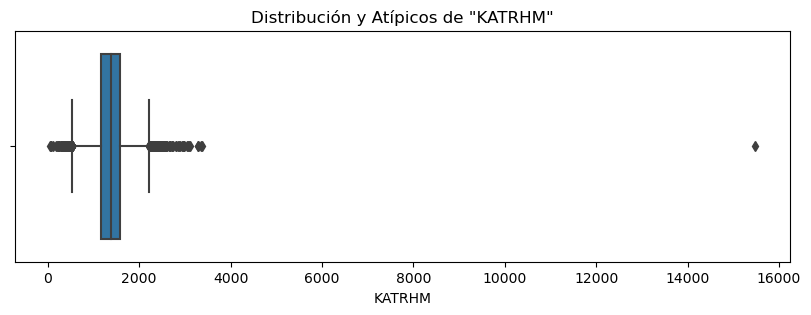



--- Análisis de '%Fibra Caña' ---
  - Nulos: 1858 (8.84%)
  - Asimetría (Skewness): -2.76
  - Media: 15.28
  - Mediana: 15.31


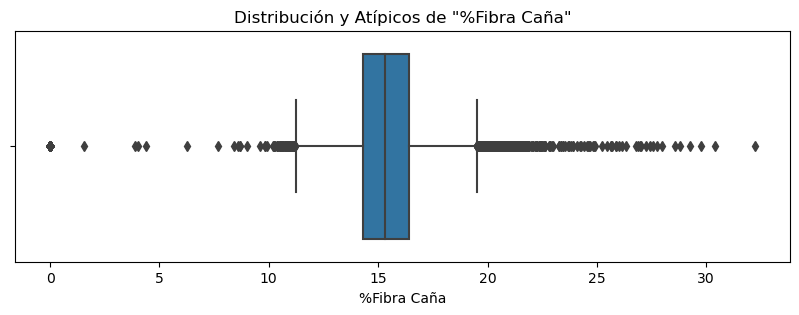



--- Análisis de '%ME Min' ---
  - Nulos: 1722 (8.19%)
  - Asimetría (Skewness): 4.28
  - Media: 0.64
  - Mediana: 0.34


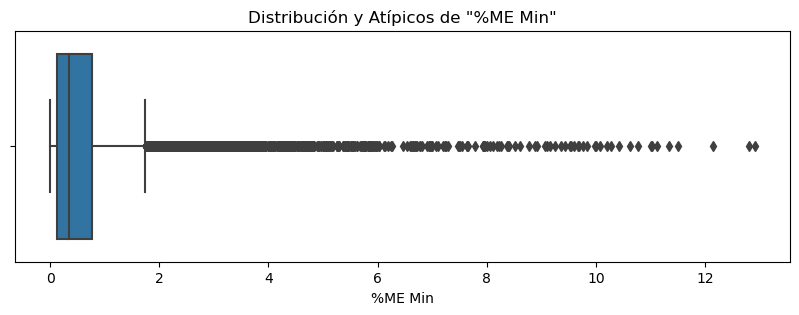



--- Análisis de '%ME Veg' ---
  - Nulos: 1720 (8.18%)
  - Asimetría (Skewness): 21.55
  - Media: 7.76
  - Mediana: 8.09


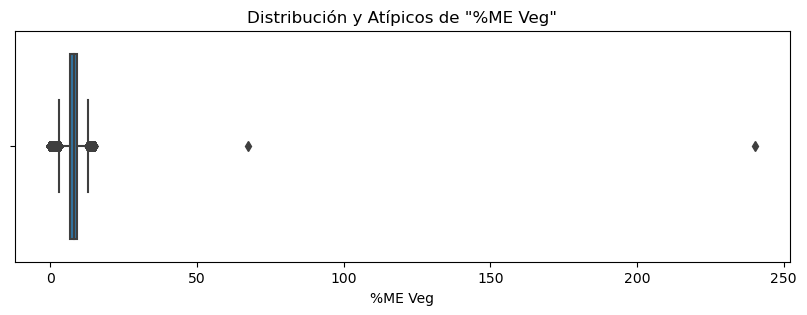



--- Análisis de '%ME Tot' ---
  - Nulos: 1720 (8.18%)
  - Asimetría (Skewness): 0.48
  - Media: 8.60
  - Mediana: 8.67


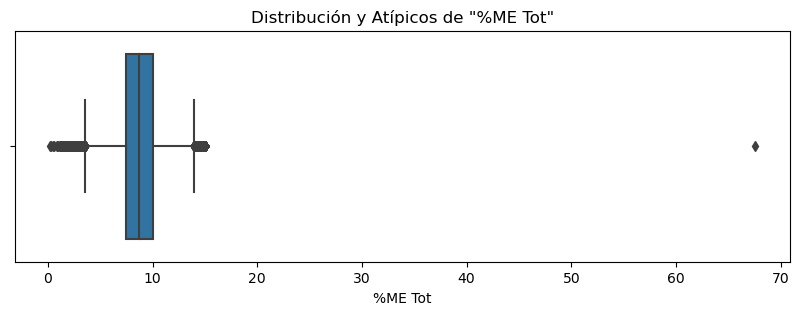



--- Análisis de 'Brix' ---
  - Nulos: 267 (1.27%)
  - Asimetría (Skewness): -2.58
  - Media: 13.13
  - Mediana: 14.31


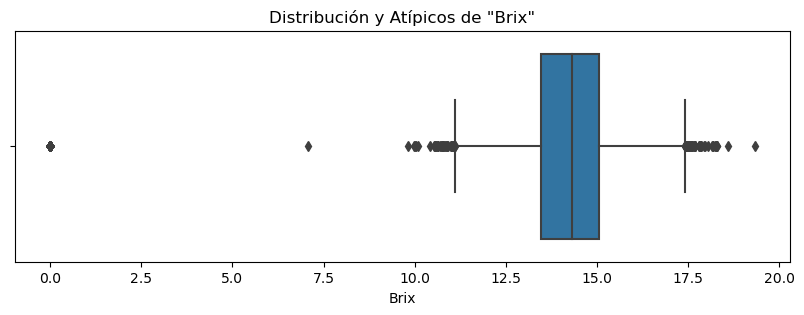



--- Análisis de 'Pureza' ---
  - Nulos: 269 (1.28%)
  - Asimetría (Skewness): -2.83
  - Media: 77.81
  - Mediana: 85.53


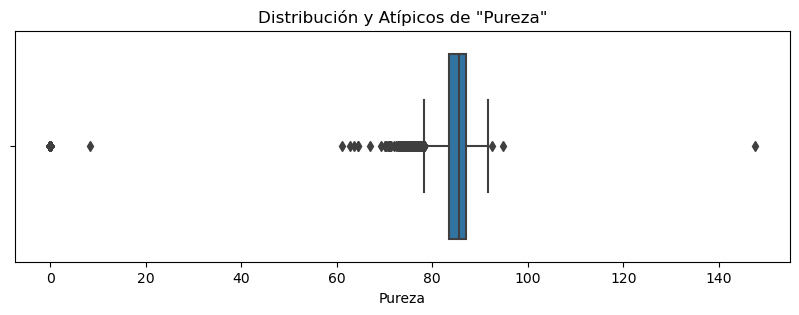



--- Análisis de 'Fosfato Jugo' ---
  - Nulos: 1858 (8.84%)
  - Asimetría (Skewness): 74.03
  - Media: 332.50
  - Mediana: 289.00


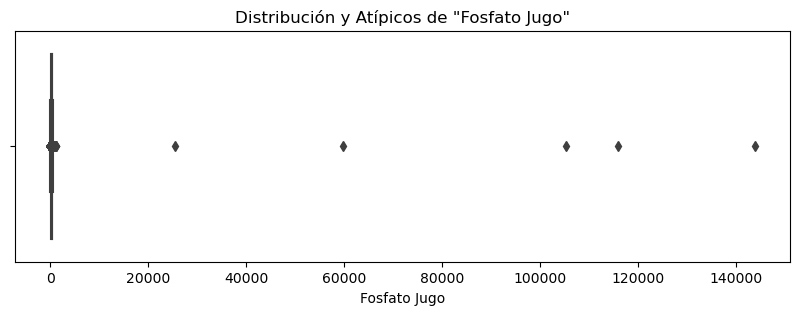

In [67]:
# Iteramos sobre cada columna identificada para la Fase 3
for columna in columnas_fase3:
    # --- Cálculo de estadísticas ---
    asimetria = df[columna].skew()
    media = df[columna].mean()
    mediana = df[columna].median()
    
    print(f"--- Análisis de '{columna}' ---")
    print(f"  - Nulos: {df[columna].isnull().sum()} ({df[columna].isnull().sum() / len(df) * 100:.2f}%)")
    print(f"  - Asimetría (Skewness): {asimetria:.2f}")
    print(f"  - Media: {media:.2f}")
    print(f"  - Mediana: {mediana:.2f}")
    
    # --- Visualización del Boxplot ---
    plt.figure(figsize=(10, 3)) # Crea una figura nueva para cada gráfico
    sns.boxplot(x=df[columna])
    plt.title(f'Distribución y Atípicos de "{columna}"')
    plt.show() # Muestra el gráfico en la salida de la celda
    print("\n") # Agrega un espacio para mayor claridad

In [68]:
# Listas para clasificar las columnas
columnas_para_mediana_f3 = []
columnas_para_media_f3 = []

# Umbral de asimetría para decidir
umbral_asimetria = 1.0

# Clasificamos cada columna basándonos en su asimetría
for columna in columnas_fase3:
    asimetria = df[columna].skew()
    
    if abs(asimetria) > umbral_asimetria:
        columnas_para_mediana_f3.append(columna)
    else:
        columnas_para_media_f3.append(columna)

print("--- Clasificación Final para Imputación (Fase 3) ---")
print(f"✅ Columnas a imputar con MEDIANA (distribución asimétrica):")
print(f"   {columnas_para_mediana_f3}")
print(f"\n✅ Columnas a imputar con MEDIA (distribución simétrica):")
print(f"   {columnas_para_media_f3}")

--- Clasificación Final para Imputación (Fase 3) ---
✅ Columnas a imputar con MEDIANA (distribución asimétrica):
   ['Dist Km', 'Cod. T.Cultivo', 'Ton.Azucar', 'Rdto', '%Sac.Muestreadora', '%ATR', 'KATRHM', '%Fibra Caña', '%ME Min', '%ME Veg', 'Brix', 'Pureza', 'Fosfato Jugo']

✅ Columnas a imputar con MEDIA (distribución simétrica):
   ['Tenencia', 'Dosis Madurante', 'TAH', 'TAHM', 'Sac.Caña Precosecha', '%Sac.Caña', '%ME Tot']


In [69]:
# Imputar con la MEDIANA
if columnas_para_mediana_f3:
    mediana_imputacion = df[columnas_para_mediana_f3].median()
    df[columnas_para_mediana_f3] = df[columnas_para_mediana_f3].fillna(mediana_imputacion)
    print("-> Valores nulos imputados con la MEDIANA.")

# Imputar con la MEDIA
if columnas_para_media_f3:
    media_imputacion = df[columnas_para_media_f3].mean()
    df[columnas_para_media_f3] = df[columnas_para_media_f3].fillna(media_imputacion)
    print("-> Valores nulos imputados con la MEDIA.")

df[columnas_para_mediana_f3].info()
df[columnas_para_media_f3].info()


-> Valores nulos imputados con la MEDIANA.
-> Valores nulos imputados con la MEDIA.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dist Km            21027 non-null  float64
 1   Cod. T.Cultivo     21027 non-null  float64
 2   Ton.Azucar         21027 non-null  float64
 3   Rdto               21027 non-null  float64
 4   %Sac.Muestreadora  21027 non-null  float64
 5   %ATR               21027 non-null  float64
 6   KATRHM             21027 non-null  float64
 7   %Fibra Caña        21027 non-null  float64
 8   %ME Min            21027 non-null  float64
 9   %ME Veg            21027 non-null  float64
 10  Brix               21027 non-null  float64
 11  Pureza             21027 non-null  float64
 12  Fosfato Jugo       21027 non-null  float64
dtypes: float64(13)
memory usage: 2.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeInd

### RE-CHEQUEO Datos nulos

In [70]:
# 1. Identifica las variables o columnas en el dataset con valores nulos
columnas_con_nulos = [
    (columna, df[columna].isnull().sum())
    for columna in df.columns
    if df[columna].isnull().sum() > 0
]
# 2. Convertir la lista a un DataFrame de pandas para una mejor visualización
df_nulos = pd.DataFrame(columnas_con_nulos, columns=['Columna', 'Cantidad de Nulos'])

# Ordenar los resultados de mayor a menor
df_nulos_ordenado = df_nulos.sort_values(by='Cantidad de Nulos', ascending=False)


# Imprimir el DataFrame resultante
print("\nResultados en una tabla ordenada de mayor a menor:")
df_nulos_ordenado


Resultados en una tabla ordenada de mayor a menor:


,Columna,Cantidad de Nulos
7,Codigo Estacion,14742
1,D.S.,13859
2,Ult.Riego,12557
5,Producto,9778
4,Fec.Madur.,9775
0,Suelo,3758
6,Cerca de,126
3,Cultivo,2


## Desarrollo de Modelos

## Validación y Evaluación

# Modelo de Clasificación

## Creación de Categorías

## Desarrollo de Modelos de Clasificación

## Validación y Evaluación

# Conclusiones

# Innovación y Propuesta de Mejora